# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt

%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

### Layout ...

1. Create a class ....
  * put all functions inside
  * in Markdown write the top level question and then answer it.
  * then show the work that got the answer with comments
  
  
2. Questions:
  * If the last element in the pipeline (usually the model) isn't a model. How to write it? 
  * Do I need a score function? 
  * if so, I could write empty functions...
  * The last thing could be a print everything before it function.
  * How to tie in answering the questions? 
  
  
3. The order:
  * 


In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# functions
def mlist(start_n, increment, n):
    """Creates a list of the bin widths."""
    llist = []
    for i in range(n):
        llist.append(start_n + (increment*i))
    
    return llist

def hist_plots(dframe, b_edges, axx):
    """Creates histogram and density plot."""
    density = stats.gaussian_kde(dframe.temperature)
    n_bins = len(b_edges)
    n, x, _ = axes[axx].hist(dframe.temperature, bins=b_edges, density=True)
    axes[axx].set_title("Histogram and density plot (" +str(n_bins)+ " bins)", size=16)
    axes[axx].plot(x,density(x))
    axes[axx].set_xlabel('temperature')
    axes[axx].set_ylabel('density')
    axes[axx].xaxis.label.set_fontsize(16)
    axes[axx].yaxis.label.set_fontsize(16)
    axes[axx].tick_params(axis = 'x', which = 'major', labelsize = 16)
    axes[axx].tick_params(axis = 'y', which = 'major', labelsize = 16)
    plt.tight_layout()
    
    return 0

# Empirical cumulative distribution functions (ECDF)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


def bootstrap_replicate_1d(data, func):
    """Bootstraps the data and passes it to the desired function."""
    
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def diff_from_wund(data,wund_value = 98.6):
    """Returns the difference between the data's mean and some value. 
       The default is the Wunderlich value of 98.6.
    """
    return np.mean(data) - wund_value


### Is the distribution of body temperatures normal?
Yes, the body temperature data is approximately noromal. There is a slight skew to the left but nothing that should preclude the data from being considered normally distributed. 

Here are some [some quick and dirty ways](https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/) to determine the bin width and how many bins to use. Essentially, the number of bins is roughly determined to be the square root of the number of records. There are 130 records and the square root of 130 is about 11. The site actually says to ***round up*** regardless of the size of the decimal. Below there are two plots. One with 11 bins and the other with 12. Both are plotted to show that with either 11 or 12 bins the distribution is approximately normal.

The bin width is determined by "dividing the \[...\] (Max - Min) value by the # of bins." (100.8 - 96.3) / 11 is approximately 0.4. The same bin width was used for both the 11 bins and 12 bins.

The third figure is a density plot. It also shows that the data is normally distributed. It has a bell shape and is mostly symmetric about the mean.

The cell below the plots labelled [3 sigma rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule/) shows a rough measure of normality. When "n" is less than 300 the number of values that are greater than 3 standard deviations (in any direction) from the mean should be low. In our test, there is only one case of the 130 records that is greater than 3 standard deviations from the mean. This along with the histogram and density plots provide ample evidence that the temperature data is normally distributed. 

2018-12-23 09:05:25.003810
98.24923076923078


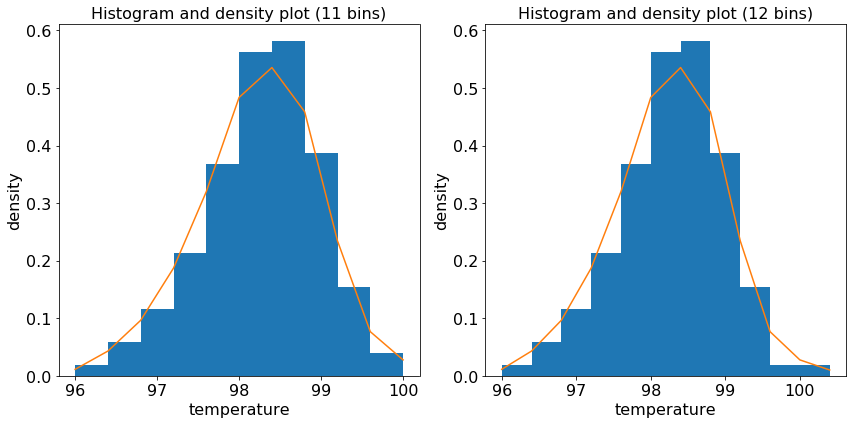

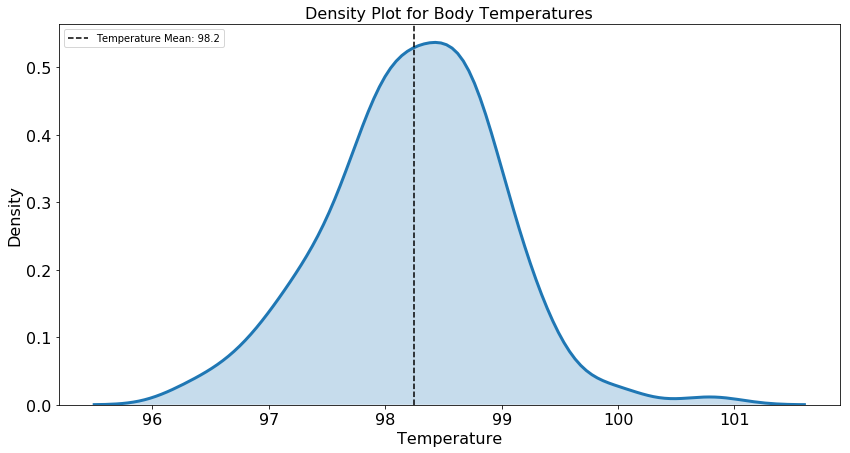

2018-12-23 09:05:25.540462


In [33]:
# Is the distribution of body temperatures normal?
print(dt.datetime.now())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

lbin = []
lbin.append(mlist(96.0,.4,11))
lbin.append(mlist(96.0,.4,12))

for i in range(len(lbin)):
    _ = hist_plots(df,lbin[i],i)
    
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    #fxn()
# density plot
    temp_mean = df.temperature.mean()
    print(temp_mean)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,7))
    temps = df['temperature']
    binz = mlist(96.0,.4,11)
    _ = sns.distplot(temps, hist = False, bins=binz, kde = True,
                  kde_kws = {'shade': True, 'linewidth': 3})
    _ = plt.title('Density Plot for Body Temperatures', fontsize=16)
    _ = plt.xlabel('Temperature', fontsize=16)
    _ = plt.ylabel('Density', fontsize=16)
    _ = plt.tick_params(axis = 'x', which = 'major', labelsize = 16)
    _ = plt.tick_params(axis = 'y', which = 'major', labelsize = 16)
    _ = plt.axvline(x=temp_mean,color='k', linestyle='--',label='Temperature Mean: 98.2' )
    _ = plt.legend(loc='upper left')
    plt.show()


print(dt.datetime.now())

In [31]:
# 3 sigma rule
tstd = np.std(df.temperature)
n = len(df.temperature)

temp_mean = df.temperature.mean()

tmax = df.temperature.max()
tmin = df.temperature.min()

print('min temperature is' , (tmin - temp_mean) / tstd, ' sample std devs from the mean:')
print('max temperature is' , (tmax - temp_mean) / tstd, ' sample std devs from the mean:')

stddevs_above = np.sum(df.temperature > temp_mean+(3*tstd))
stddevs_below = np.sum(df.temperature < temp_mean-(3*tstd))

# more evidence of data normality
print('number of records with temps > than 3 STDs above the mean:', stddevs_above)
print('number of records with temps < than 3 STDs below the mean:', stddevs_below)



min temperature is -2.6688711006174173  sample std devs from the mean:
max temperature is 3.4924927267747696  sample std devs from the mean:
number of records with temps > than 3 STDs above the mean: 1
number of records with temps < than 3 STDs below the mean: 0


### Is the sample size large? Are the observations independent?
* The number of records in the sample is 130. That easily exceeds the "n is greater than or equal to 30" condition for Normality. 
* The observations are independent. They most certainly do not exceed 10% of the entire population of humans. 



### Is the true population mean really 98.6 degrees F?
**Null Hypothesis:** The true mean temperature of the human body is 98.6$^{\circ}$F.

**Alternative Hypothesis** The true mean temperature of the human body is not 98.6$^{\circ}$F.

We reject the null hypothesis that the true mean body temperatures is 98.6. The histogram below shows the means of 10000 replicates bootstrapped from the original data. The mean of the replicates is about 98.25. Neither the 95% nor the 99% confidence intervals include 98.6 in them. In fact, both are significantly lower.

After shifting the data to the Wunderlich mean of 98.6 degrees F and taking the difference between every temperature and the new mean, we took the percentage of the differences, out of 10000 bootstraps, that were equal to or larger (in absolute terms) than the observed difference between the Wunderlich mean and the original mean of the dataset. There were **no** records out of the 10000 trials that were equal to or larger than the observed difference. The p-value was 0.

98.250308
98.50999999999999
97.99615384615385
0.005138461538461456
[97.99615384615385, 98.00129230769231, 98.00643076923078, 98.01156923076923, 98.01670769230769]
95% CI:  [98.12384615 98.37615385]
99% CI:  [98.07846154 98.41154231]
0.06405661469519336
0.06426861381575626


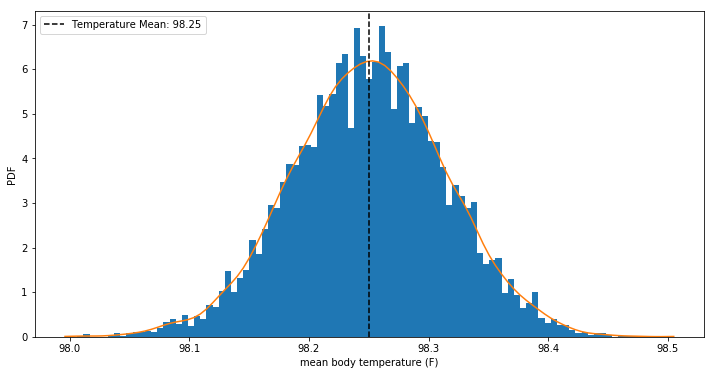

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df.temperature,np.mean,10000)

bs_mean = np.mean(bs_replicates)
print(bs_mean)
print(np.max(bs_replicates))
print(np.min(bs_replicates))

print((np.max(bs_replicates) - np.min(bs_replicates)) / np.sqrt(10000))

bin_edges = mlist(np.min(bs_replicates),\
                 (np.max(bs_replicates) - np.min(bs_replicates)) / np.sqrt(10000), int(np.sqrt(10000)))

print(bin_edges[:5])

conf_int_95 = np.percentile(bs_replicates,[2.5,97.5])
conf_int_99 = np.percentile(bs_replicates,[0.5,99.5])

print('95% CI: ', str(conf_int_95))
print('99% CI: ', str(conf_int_99))


# Compute and print SEM
sem = np.std(df.temperature) / np.sqrt(len(df.temperature))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
density = stats.gaussian_kde(bs_replicates)
_, x, _ = plt.hist(bs_replicates, bins=bin_edges, density=True)
_ = plt.plot(x,density(x))
_ = plt.xlabel('mean body temperature (F)')
_ = plt.ylabel('PDF')
_ = plt.axvline(x=bs_mean,color='k', linestyle='--',label='Temperature Mean: 98.25' )
_ = plt.legend(loc='upper left')


# Show the plot
plt.show()

### Bootstrap Hypothesis Test
**Null Hypothesis:** The true mean temperature of the human body is 98.6$^{\circ}$F.

**Alternative Hypothesis** The true mean temperature of the human body is not 98.6$^{\circ}$F.

In [10]:
temp_mean = np.mean(df.temperature)
print('the mean temp of the dataset: ', temp_mean)

Wunderlich_value = 98.6 # degrees Fahrenheit
print('Wunderlich\'s mean: ', Wunderlich_value)

print(diff_from_wund(df.temperature))

diff_observed = diff_from_wund(df.temperature)
print("observed difference: ", diff_observed)
# shift the dataset
data_shifted = (df.temperature - temp_mean) + Wunderlich_value

print(data_shifted[:5])

boot_reps = draw_bs_reps(data_shifted, diff_from_wund, 100000)
print(boot_reps[:5])
p_value = np.sum(boot_reps <= diff_observed)
p_value

the mean temp of the dataset:  98.24923076923078
Wunderlich's mean:  98.6
-0.35076923076921673
observed difference:  -0.35076923076921673
0    99.650769
1    98.750769
2    98.150769
3    99.550769
4    98.350769
Name: temperature, dtype: float64
[-0.07076923  0.04230769 -0.1         0.03384615  0.01769231]


0

### The Frequentist Approach
**Null Hypothesis:** The true mean temperature of the human body is 98.6$^{\circ}$F.

**Alternative Hypothesis** The true mean temperature of the human body is not 98.6$^{\circ}$F.

The Frequentist approach confirms the results of the Bootstrap tests, that the null hypothesis should be rejected. The tests below take the data shifted mean (same as the Wunderlich mean) and determines how many z and t scores it is away from the observed mean of the original data. The t statistic (the correct statistic to use) shows that the Wunderlich mean is more than 5 standard errors, with a very small p-value (see below), from the mean observed in the original data. The z score shows the difference in means to be less than 1 standard deviation with a p-value of 0.63. We don't know the true population standard deviation so the z score is not the correct statistic to use. With that said, the value of the t-statistics helps us in rejecting the null hypothesis. 

We measured the difference in means in both directions just to confirm that they gave the same answer. No surprise here. They did. 

The two ecdf's plotted together below also show that the original data and the wunderlich mean shifted data are significantly different with little or no overlap. 

2018-12-23 09:50:27.265911
0.06405661469519336
0.06405661469519337
z score one:  0.48027041116071023
z score two:  -0.4802704111607104
t score one:  5.475925202077007
t score two:  -5.475925202077006
frequentist (z score) p_value one:  0.6310351255855544
frequentist (z score) p_value two:  0.6310351255855544
frequentist (t score) p_value one:  2.1887464624206398e-07
frequentist (t score) p_value two:  2.188746462420644e-07
[98.33076923 98.28       98.19230769 98.26076923 98.17384615]
max value for bs_reps:  98.53846153846153
[98.40538462 98.58230769 98.58538462 98.60076923 98.56538462]
min value for bs_reps1:  98.32999999999998
bootstrap one: no values greater than  98.59999999999992  in  100000 trials
bootstrap two: no values less than  98.24923076923078  in  100000 trials
2018-12-23 09:50:38.846412


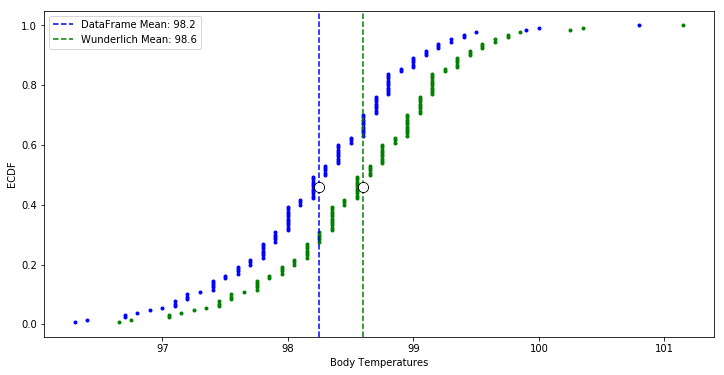

In [35]:
# the frequentist approach
print(dt.datetime.now())

# Compute ECDF for versicolor data: x_vers, y_vers
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

x_temp, y_temp = ecdf(df.temperature)
x_2, y_2 = ecdf(data_shifted)

# Generate plot
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none', color='b')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='g')

# Plot the means of both the original data set and the shifted data set
_ = plt.axvline(x=temp_mean,color='b', linestyle='--', label='DataFrame Mean: 98.2' )
#plt.annotate('DataFrame Mean: 98.2 ', 
#             xy=(98.25, 0.6),  
#             xytext=(-145, -5),
#             textcoords='offset points',
#             arrowprops=dict(facecolor='blue' ))

data_shifted_mean = np.mean(data_shifted)
_ = plt.axvline(x=data_shifted_mean,color='g', linestyle='--',label='Wunderlich Mean: 98.6' )
_ = plt.plot(98.6,0.46,'ko', markersize=10.0,mfc='none')
_ = plt.plot(temp_mean,0.46,'ko',markersize=10.0,mfc='none')
_ = plt.plot(98.6,0.46,'wo', markersize=8.0)
_ = plt.plot(temp_mean,0.46,'wo',markersize=8.0)

stddev = np.std(df.temperature)
stddev1 = np.std(data_shifted)

sem = np.std(df.temperature) / np.sqrt(len(df.temperature))
print(sem)

sem1 = np.std(data_shifted) / np.sqrt(len(data_shifted))
print(sem1)

z_scr = (data_shifted_mean - temp_mean) / stddev1
z_scr1 = (temp_mean - data_shifted_mean) / stddev

t_scr = (data_shifted_mean - temp_mean) / sem
t_scr1 = (temp_mean - data_shifted_mean) / sem1

n = df.shape[0]


print('z score one: ',z_scr)
print('z score two: ',z_scr1)

print('t score one: ',t_scr)
print('t score two: ',t_scr1)

print('frequentist (z score) p_value one: ', stats.norm.sf(abs(z_scr))*2)
print('frequentist (z score) p_value two: ', stats.norm.sf(abs(z_scr1))*2)

print('frequentist (t score) p_value one: ', stats.t.sf(np.abs(t_scr), n-1)*2 )
print('frequentist (t score) p_value two: ', stats.t.sf(np.abs(t_scr1), n-1)*2 )


n_trails = int(1e5)

bs_reps = draw_bs_reps(df.temperature,np.mean,n_trails)
bs_reps1 = draw_bs_reps(data_shifted,np.mean,n_trails)

print(bs_reps[:5])
print('max value for bs_reps: ', np.max(bs_reps))
print(bs_reps1[:5])
print('min value for bs_reps1: ', np.min(bs_reps1))

p_value = np.sum(bs_reps >= data_shifted_mean)
p_value1 = np.sum(bs_reps1 <= temp_mean)

if p_value == 0.0:
    print('bootstrap one: no values greater than ', data_shifted_mean, ' in ', n_trails, 'trials')
else:
    print('bootstrap hypothesis p_value one: ', p_value / n_trails)
    
if p_value1 == 0.0:
    print('bootstrap two: no values less than ', temp_mean, ' in ', n_trails, 'trials')
else:
    print('bootstrap hypothesis p_value two: ', p_value1 / n_trails)



#plt.annotate(' Wunderlich Mean: 98.6 ', 
#             xy=(98.6, 0.375),  
#             xytext=(25, -5),
#             textcoords='offset points',
#             arrowprops=dict(facecolor='green'))

# Label the axes
_ = plt.xlabel('Body Temperatures')
_ = plt.ylabel('ECDF')

print(dt.datetime.now())

# Display the plot
plt.legend(loc='upper left')
plt.show()

In [12]:
np.mean(data_shifted)

98.59999999999992

### Draw a small sample size of 10 from the data and repeat both frequentist tests
When taking a sample size smaller than 30 records, the t statistic should be used instead of the z score. The results below give a pretty good example of why that is. With the t statistic (two-tailed p value very close to 0.05, one-tailed p-value below 0.05) the results from above are confirmed that the null hypothesis is to be rejected. The z score shows the opposite, that the null hypothesis should NOT be rejected. 

Z scores are used for all proportions, but should only be used for continuous values if the population standard deviation is known. That means that most of the time the t-statistic will be used for continuous variables because the population standard deviation is rarely known. 

In [13]:
df_ten = np.random.choice(df.temperature,10)
data_shifted_ten = np.random.choice(data_shifted,10)
print(df_ten)

sem = np.std(df_ten)
print(sem)

sem1 = np.std(df_ten) / np.sqrt(len(df_ten))
print(sem1)

df_ten_mean = np.mean(df_ten)
data_shifted_ten_mean = np.mean(data_shifted_ten)

z_scr = (data_shifted_mean - df_ten_mean) / sem
z_scr1 = (df_ten_mean - data_shifted_mean) / sem

t_scr = (data_shifted_mean - df_ten_mean) / sem1
t_scr1 = (df_ten_mean - data_shifted_mean) / sem1

n = len(df_ten)
print('z score one: ',z_scr)
print('z score two: ',z_scr1)
print('t score one: ',t_scr)
print('t score two: ',t_scr1)

print('frequentist (z score) p_value one: ', stats.norm.sf(abs(z_scr))*2)
print('frequentist (z score) p_value two: ', stats.norm.sf(abs(z_scr1))*2)
print('frequentist (t score) p_value one: ', stats.t.sf(np.abs(t_scr), n-1)*2 )
print('frequentist (t score) p_value two: ', stats.t.sf(np.abs(t_scr1), n-1)*2 )


[99.1 98.5 98.  98.6 97.1 97.9 98.5 98.  98.1 98.6]
0.518073353879544
0.1638291793301789
z score one:  0.6948822928338
z score two:  -0.6948822928338
t score one:  2.1974107510749077
t score two:  -2.1974107510749077
frequentist (z score) p_value one:  0.4871290704384885
frequentist (z score) p_value two:  0.4871290704384885
frequentist (t score) p_value one:  0.05557472629276921
frequentist (t score) p_value two:  0.05557472629276921


### At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [14]:
alpha = 0.05
cv95 = stats.t.ppf(1.0 - alpha, df.shape[0] - 1)
print(cv95)

alpha = 0.01
cv99 = stats.t.ppf(1.0 - alpha, df.shape[0] - 1)
cv99

# 95% confidence interval ... 99% confidence interval
ci_95 = (temp_mean - cv95 *sem,temp_mean + cv95 *sem )
print(ci_95)

ci_99 = (temp_mean - cv99 *sem,temp_mean + cv99 *sem )
print(ci_99)

1.6567515939762396
(97.39091191439422, 99.10754962406733)
(97.0288559902108, 99.46960554825075)


### Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

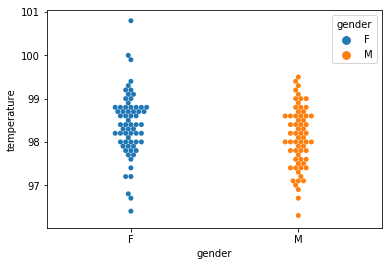

In [15]:
_ = sns.swarmplot(x='gender', y='temperature',hue='gender', data=df )
plt.xlabel('gender')
plt.show()

In [16]:
female_temps = df.loc[df.gender == 'F', 'temperature']
male_temps = df.loc[df.gender == 'M', 'temperature']
print(len(female_temps))
print(len(male_temps))
mu_temp_male = np.mean(male_temps)
mu_temp_female = np.mean(female_temps)
print(mu_temp_male)
print(mu_temp_female)
diff_mean_temps = mu_temp_female - mu_temp_male
diff_mean_temps

65
65
98.1046153846154
98.39384615384613


0.289230769230727

### Difference in mean temps between Male and Female subjects in dataset
The difference in body temps men and women appears to be statistically significant. 

In [17]:
# Generate shifted arrays
male_shifted = male_temps - mu_temp_male + temp_mean
female_shifted = female_temps - mu_temp_female + temp_mean

# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_male = draw_bs_reps(male_shifted, np.mean, 10000)
bs_reps_female = draw_bs_reps(female_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_reps = bs_reps_female - bs_reps_male

# Compute and print p-value: p
p = np.sum(bs_reps >= diff_mean_temps) / len(bs_reps)
print('p-value =', p)


p-value = 0.0123
